<a href="https://colab.research.google.com/github/rebeccahurwitz/COMPSCI282R/blob/main/HW1S%20Problem%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparations



In [151]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import product               # Cartesian product for iterators

# Make sure you put all of the given python files in the same directories before running this cell!


In [152]:
import sys, os

import gridworld as W                       # basic grid-world MDPs
import trajectory as T                      # trajectory generation
import optimizer as O                       # stochastic gradient descent optimizer
import solver as S                          # MDP solver (value-iteration)
import plot as P                            # helper-functions for plotting

In [153]:
!pip install ipympl

In [154]:
%matplotlib widget
plt.rcParams['figure.figsize'] = [9, 5]     # set default figure size
style = {                                   # global style for plots
    'border': {'color': 'red', 'linewidth': 0.5},
}

In [155]:
def to_one_hot_array(input_array):

  num_unique_values = 4
  one_hot_array = np.zeros((len(input_array), num_unique_values), dtype=int)

  for i, val in enumerate(input_array):
    one_hot_array[i, val] = 1

  return one_hot_array




# Setting up the MDP

In [156]:
def setup_mdp(size, p_slip):
    # create our world
    world = W.IcyGridWorld(size= size, p_slip= p_slip)

    # set up the reward function
    reward = np.zeros(world.n_states) - 0.25
    reward[-1] = 1.0
    reward[8] = .6
    reward[9] = -0.6

    reward[5:8] = -0.6
    reward[16:20] = -0.6

    # set up terminal states
    terminal = [24]

    return world, reward, terminal






# Comment out the appropriate line of code

### Deterministic Environment (Problem 1 & 3) ###
# world, reward, terminal = setup_mdp(size = 5, p_slip = 0)

# ### Stochastic Environment (Problem 2 & 4) ###
world, reward, terminal = setup_mdp(size = 5, p_slip = 0.3)

# Generate Expert Trajectories

In [157]:
def generate_expert_trajectories_optimal(world, reward, terminal, num_trajectories = 40):
    n_trajectories = num_trajectories         # the number of "expert" trajectories
    discount = 0.9              # discount for constructing an "expert" policy
    weighting = lambda x: x**1  # down-weight less optimal actions
    start = [0]                  # starting states for the expert

    # compute the value-function
    value, Q = S.value_iteration(world.p_transition, reward, discount)


    # create our deterministic policy using the value function
    policy = S.optimal_policy_from_value(world, value)
    print(policy)


    # a function that executes our deterministic policy by choosing actions according to it
    policy_exec = T.policy_adapter(policy)


    # generate trajectories
    tjs = list(T.generate_trajectories(n_trajectories, world, policy_exec, start, terminal))

    return tjs, policy, Q, True



def generate_expert_trajectories_suboptimal(world, reward, terminal, num_trajectories = 40):
    n_trajectories = num_trajectories         # the number of "expert" trajectories
    discount = 0.9              # discount for constructing an "expert" policy
    weighting = lambda x: x**1  # down-weight less optimal actions
    start = [0]                  # starting states for the expert

    # compute the value-function
    value, Q = S.value_iteration(world.p_transition, reward, discount)




    # # create our stochastic policy using the value function
    policy = S.stochastic_policy_from_value(world, value, w=weighting)
    print(np.round(policy, 3))



    # # a function that executes our stochastic policy by choosing actions according to it
    policy_exec = T.stochastic_policy_adapter(policy)

    # generate trajectories
    tjs = list(T.generate_trajectories(n_trajectories, world, policy_exec, start, terminal))

    return tjs, policy, Q, False


#Comment out the appropriate Line of Code


# Fully Optimal Expert (Problem 1)
# trajectories, expert_policy, Q, optimal = generate_expert_trajectories_optimal(world, reward, terminal, num_trajectories = 20)

# Fully Optimal Expert (Problem 2)
# trajectories, expert_policy, Q, optimal = generate_expert_trajectories_optimal(world, reward, terminal, num_trajectories = 40)


# Suboptimal Expert (Problem 3)
trajectories, expert_policy, Q, optimal = generate_expert_trajectories_suboptimal(world, reward, terminal, num_trajectories = 10)


# Suboptimal Expert (Problem 4)
# trajectories, expert_policy, Q, optimal = generate_expert_trajectories_suboptimal(world, reward, terminal, num_trajectories = 40)



[[0.381 0.224 0.17  0.224]
 [0.434 0.135 0.202 0.229]
 [0.415 0.108 0.271 0.205]
 [0.153 0.108 0.522 0.218]
 [0.185 0.264 0.367 0.185]
 [0.295 0.15  0.358 0.197]
 [0.435 0.078 0.314 0.173]
 [0.583 0.056 0.241 0.12 ]
 [0.263 0.123 0.425 0.189]
 [0.142 0.245 0.541 0.072]
 [0.341 0.201 0.374 0.084]
 [0.446 0.125 0.326 0.103]
 [0.435 0.091 0.348 0.126]
 [0.375 0.07  0.385 0.17 ]
 [0.197 0.084 0.667 0.052]
 [0.282 0.202 0.408 0.108]
 [0.345 0.099 0.466 0.09 ]
 [0.376 0.05  0.505 0.069]
 [0.368 0.037 0.548 0.046]
 [0.119 0.036 0.81  0.035]
 [0.483 0.207 0.207 0.103]
 [0.634 0.091 0.212 0.063]
 [0.698 0.064 0.191 0.047]
 [0.756 0.045 0.165 0.034]
 [0.423 0.092 0.423 0.062]]


# Training a Behavioral Cloning Model on the trajectories of the expert

In [158]:
states = []
actions = []


In [159]:

for traject in trajectories:
  for t in traject._t:
    states.append(t[0])
    actions.append(t[1])


# USE your favorite Supervised Learning Algorithm to train a model on the states and actions dataset where the states list is the input data and the actions list is the output data. Once you trained your model extract a policy from it for each of the 25 states and call it 'bc_policy'

# Make sure you use 1-hot encoding for the states and actions spaces!

In [160]:
### FILL IN THE CODE ########
# Make sure you use 1-hot encoding for the states and actions spaces!

import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

states = np.array(states).reshape(-1, 1)
actions = np.array(actions).reshape(-1,1).ravel()
onehot = OneHotEncoder()
state_range = np.arange(25).reshape(-1, 1)
onehot.fit(state_range)

states_encoded = onehot.transform(states)

model1 = LogisticRegression(multi_class="multinomial", max_iter=1000)
model1.fit(states_encoded, actions)

#_____________________________
#_____________________________
#_____________________________
#_____________________________
#_____________________________
#_____________________________
#_____________________________
#_____________________________
#_____________________________


bc_policy = model1.predict(onehot.transform(state_range)) #This should be an array of shape (25, ) with entries being either 0, 1, 2 or 3 (corresponding to the actions for each of the 25 states)

assert bc_policy.shape == (25, )

In [161]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

def to_one_hot_array_new(input_array, num_unique_values):
    one_hot_array = np.zeros((len(input_array), num_unique_values), dtype=int)
    for i, val in enumerate(input_array):
        one_hot_array[i, val] = 1
    return one_hot_array


states_encoded = to_one_hot_array_new(states, 25)
actions_encoded = to_one_hot_array_new(actions, 4)

model1 = LogisticRegression(multi_class="multinomial", max_iter=10000)
model1.fit(states_encoded, np.argmax(actions_encoded, axis=1))

#state_range_encoded =
bc_policy = model1.predict(to_one_hot_array_new(np.arange(25), 25))

assert bc_policy.shape == (25, )


In [162]:
bc_policy

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0])

Let's have a look at our world via the reward (left), expert policy (right) and trajectories (right, transparent white lines).
The initial state for the trajectories is the bottom-left state.

In [163]:
from google.colab import output
output.enable_custom_widget_manager()

# Plot of the MDP (with corresponding reward and expert behavior)





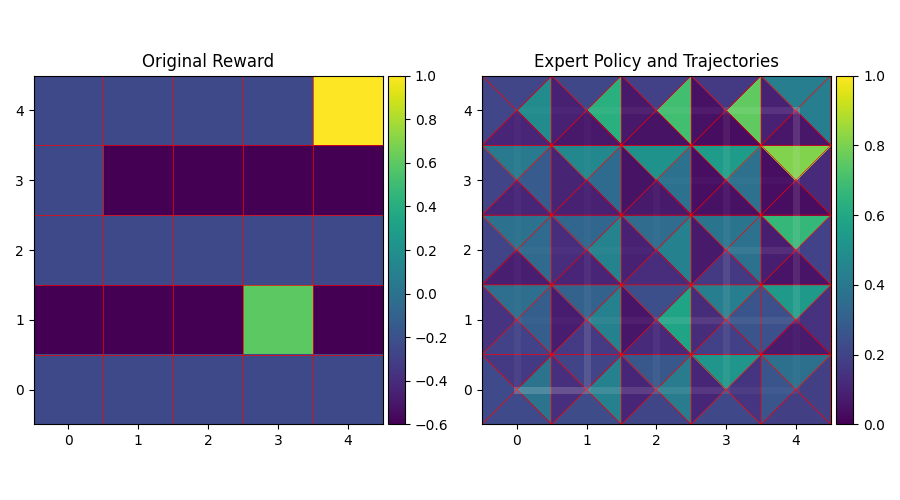

In [164]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.title.set_text('Original Reward')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
p = P.plot_state_values(ax, world, reward, **style)
fig.colorbar(p, cax=cax)

ax = fig.add_subplot(122)
ax.title.set_text('Expert Policy and Trajectories')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)



if optimal:
  p = P.plot_stochastic_policy(ax, world, to_one_hot_array(expert_policy), **style)
else:
  p = P.plot_stochastic_policy(ax, world, expert_policy, **style)







for t in trajectories:
    P.plot_trajectory(ax, world, t, lw=5, color='white', alpha=0.025)


fig.colorbar(p, cax=cax)


fig.tight_layout()
plt.show()

Training accuracy: 56.60%
Cross-Validation mean accuracy: 47.82%


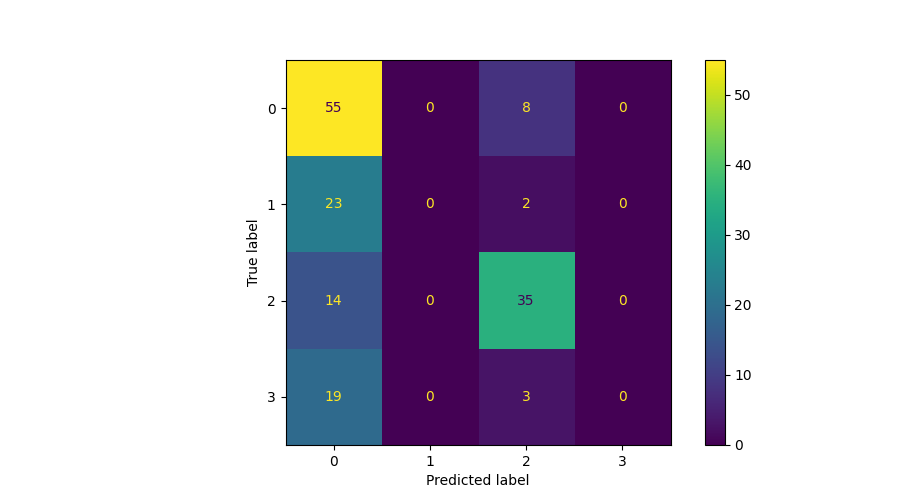

In [165]:
training_predictions = model1.predict(states_encoded)
accuracy = np.mean(training_predictions == actions.ravel())
print(f"Training accuracy: {accuracy * 100:.2f}%")


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(actions.ravel(), training_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, states_encoded, actions.ravel(), cv=5)  # 5-fold cross validation
print(f"Cross-Validation mean accuracy: {scores.mean() * 100:.2f}%")



# Plot the BC Policy (The red arrows on the left plot are the true optimal policy)

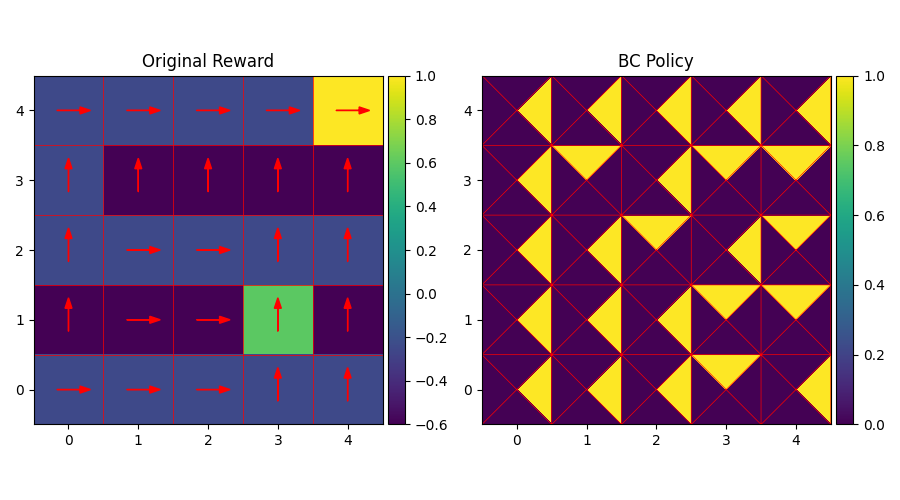

In [166]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.title.set_text('Original Reward')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
p = P.plot_state_values(ax, world, reward, **style)
P.plot_deterministic_policy(ax, world, S.optimal_policy(world, reward, 0.9), color='red')
fig.colorbar(p, cax=cax)


ax = fig.add_subplot(122)
ax.title.set_text('BC Policy')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
p = P.plot_stochastic_policy(ax, world, to_one_hot_array(bc_policy), **style)

fig.colorbar(p, cax=cax)


fig.tight_layout()
plt.show()

In [167]:
def calculate_value_function(reward, dynamics, policy, discount_factor=0.9, tol=1e-6, max_iterations=1000):
    num_states, _, num_actions = dynamics.shape
    value_function = np.zeros(num_states)


    for iteration in range(max_iterations):
        prev_value_function = np.copy(value_function)

        for state in range(num_states):
            action_probs = policy[state, :]
            action_value = 0

            for action in range(num_actions):
                next_state_values = np.sum(dynamics[state, :, action] * prev_value_function)
                action_value += action_probs[action] * (reward[state] + discount_factor * next_state_values)

            value_function[state] = action_value

        if np.max(np.abs(value_function - prev_value_function)) < tol:
            break

    return value_function

Value function with the true reward function to get an idea of the quality of the learnt policy

# Value function plots

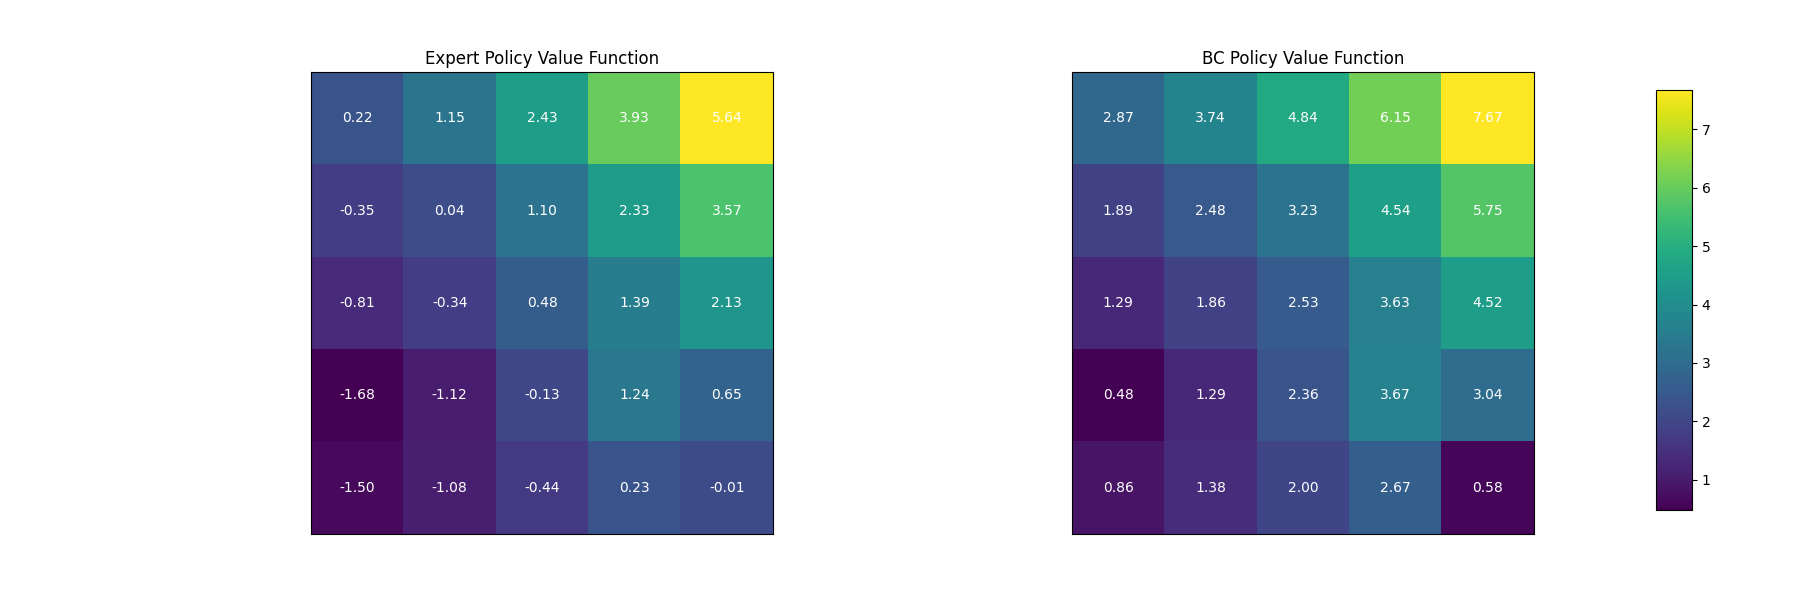

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Create sample 1D arrays of size 25
if optimal:
  values1 = calculate_value_function(reward, world.p_transition, to_one_hot_array(expert_policy))
else:
  values1 = calculate_value_function(reward, world.p_transition, expert_policy)

values3 = calculate_value_function(reward, world.p_transition, to_one_hot_array(bc_policy))

# Create subplots in a row
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Iterate through each subplot
for ax, values in zip(axes, [values1, values3]):
    # Rearrange the values to match the desired corner arrangement
    values_arranged = np.flipud(values.reshape(5, 5))

    # Use the 'viridis' colormap to map values to colors
    im = ax.imshow(values_arranged, cmap='viridis', interpolation='nearest')

    # Add text annotations for each cell
    for i in range(5):
        for j in range(5):
            ax.text(j, i, f'{values_arranged[i, j]:.2f}', ha='center', va='center', color='white')

    # Set title for each subplot
    # ax.set_title(f'Array {values[0]:.2f} - {values[-1]:.2f}')

    # Remove x and y ticks for better layout
    ax.set_xticks([])
    ax.set_yticks([])

# Add a colorbar
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position of colorbar
fig.colorbar(im, cax=cax)



# Adjust layout for better spacing
# plt.tight_layout()

axes[0].set_title('Expert Policy Value Function')
axes[1].set_title('BC Policy Value Function')


plt.show()


# References

* [Abbel & Ng 2004]: https://doi.org/10.1145/1015330.1015430
* [Bishop 2006]: https://www.springer.com/us/book/9780387310732
* [Jaynes 1957]: https://doi.org/10.1103/physrev.106.620
* [Kivinen et. al. 1997]: https://doi.org/10.1006/inco.1996.2612
* [Ng et al. 99]: https://dl.acm.org/citation.cfm?id=645528.657613
* [Osa et al. 2018]: https://arxiv.org/abs/1811.06711
* [Ziebart et al. 2008]: http://www.cs.cmu.edu/~bziebart/publications/maximum-entropy-inverse-reinforcement-learning.html
* [Ziebart 2010]: https://www.cs.cmu.edu/~bziebart/publications/thesis-bziebart.pdf
* Reused code from: https://github.com/qzed/irl-maxent